# Visual computing in the life sciences
## Assignment Sheet 5
### Mauricio Larcerda, Camila Duitama

### Exercise 1 (Image Filtering, 25 Points)

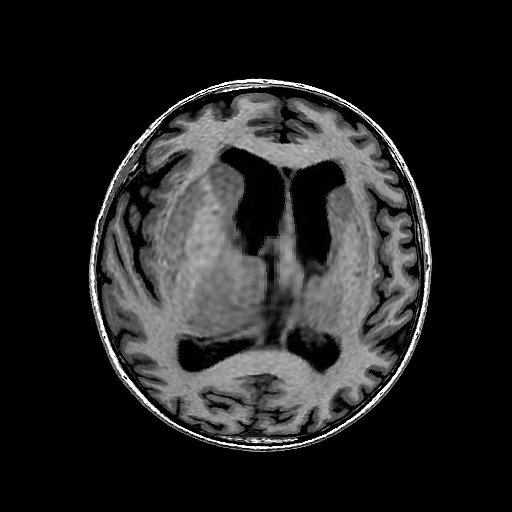 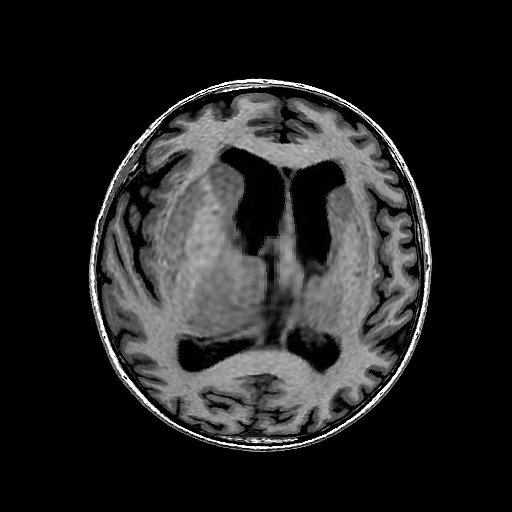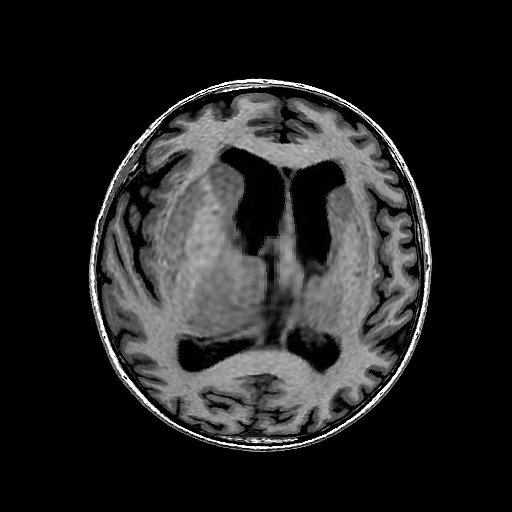

##### Figure 1: Input image (left). Detected edges at dierent scales (middle). Warped image (right).

a) Download the image axial-brain.jpg from the lecture homepage. Please submit all the images
resulted from the following tasks.


- Define a 15 x 15 kernel (k1), where all non-diagonal elements are set to zero, and on the diagonal to 1 15 . Use convolution to filter the brain image with the given kernel. (3P) What effect does this filter have on the input image? (1P)

- Repeat the last task with a new 15 x 15 kernel (k2), with all the elements being zero everywhere, except the elements on 8th row (if we start counting at one) are set to 115 . What is the effect of applying this filter on the input image? (1P)

- Briefly explain what is the difference between applying both filters k1 and k2 on the image using different orders, i.e., once apply k1 first and then k2, and once k2 first and then k1?(2P)


- Is applying both filters k1 and k2 on the image, with k1 first and then k2, the same as applying a 15 x 15 kernel, with all elements set to zero except the elements on the diagonal and on the 8th row that are set to 115 ? If yes, briefly explain why. If no, then what is the equivalent filter for applying k1 and k2? (3P)

b) Use Canny edge detection from the scikit-image library to detect edges of the input image at
different scales f = f0:001; 1; 2; 3g. (3P) 

Combine the resulting edges at different scales into one grayscale image, with edges at finer scales having smaller intensity values, similar to Figure 1.

(1P) By comparing the edge image to the input, what do you think is the role of f in detecting
edges? (1P)


c) As you saw in the lecture, images can be described as a scalar function f(x; y). In this task, you
will implement image warping, which is for example used for distortion correction. In our case,
we will use it to create a fish eye effect on the input, as you see in the right image in Figure 1.
- We will implement backward warping, i.e., iterate over the pixel locations (xo; yo) in the
output image, and copy over the intensity value from the corresponding position (xi; yi) in
the input image. Our fish eye warping will be implemented in polar coordinates:
    
    
    
where (cx; cy) is the center of the fish eye. First implement the given equations to compute
ri and fi. (5P)
- Use ri and fi to estimate (xi; yi), that is the pixel location in the input image. (3P)
- Briefly explain whether it would be different to create the resulting image by iterating over input pixels to find the corresponding pixels in the output image (forward warping)? (2

### Exercise 2 (Markov Random Fields, 25 Points)

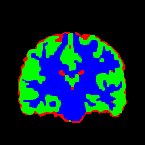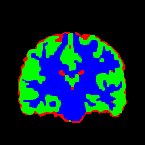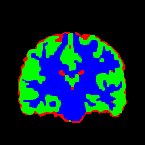

#### Figure 2:

A discretized version of the segmentation result from sheet 4 (left), the result after repeated
application of Iterated Conditional Modes with higher values of f (center), and the final probabilistic
segmentation result with the MRF term (right).

a) Load the noisy brain image brain-noisy.png from sheet 4, and download the mask.png from the
lecture homepage. Based on your implementation of the EM algorithm from sheet 4, but leaving
out the median filtering, create a discrete (hard / non-probabilistic) label image that contains the
most likely material for each pixel. Output it as an RGB image. For the segmentation use the
mask.png in order to apply the algorithms only on the foreground pixels. (3P)


b) Implement one iteration of the Iterated Conditional Modes (ICM) algorithm (for a Markov Ran-
dom Field that uses the Potts model and beta = 0:5) and use it to update the label image. Output
the result as an RGB image. (5P)

c) Apply your ICM iteration five times overall. Output the number of pixels whose label changes in
each iteration, and output the nal labels as an RGB image. (3P)

d) Integrate your implementation of the ICM into the EM algorithm and run it until convergence.
Output the final result as an RGB image. (6P)

e) Increase the beta parameter and repeat task d). At which value of beta is the final segmentation almost
noise-free similar to Fig. 2 right? Output the final result. (3P)

f) Compare the output from task e) to the result of segmentation using GMM. How do the segmen-
tation images differ and how would you explain the difference? (2P)


g) So far, given the different methods for image segmentation, when would you choose 

i) Threshold
based segmentation 

ii) GMM 

iii) MRF for segmenting a given image? (3P)